In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
train_dataset=pd.read_csv('train.csv')
test_dataset=pd.read_csv('test.csv')

In [3]:
test_data=test_dataset.copy()
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train_data=train_dataset.copy()
train_label=train_data.pop('SalePrice')
train_label=np.array(train_label)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
print('Training data Size : {}'.format(train_data.shape))
print('Testing data Size : {}'.format(test_data.shape))

Training data Size : (1460, 80)
Testing data Size : (1459, 80)


In [6]:
def drop_null(data):
    data=data.drop(['GarageYrBlt','Utilities','GarageCond','GarageQual','BsmtCond','Electrical',
                   'FireplaceQu','MiscFeature','Fence','MasVnrArea','Alley','PoolQC'],axis=1)
    data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())
    data['BsmtFinType2']=data['BsmtFinType2'].fillna('NA')
    data['BsmtExposure']=data['BsmtExposure'].fillna('NA')
    data['BsmtFinType1']=data['BsmtFinType1'].fillna('NA')
    data['MasVnrType']=data['MasVnrType'].fillna('None')
    data['BsmtQual']=data['BsmtQual'].fillna('NA')
    data['GarageType']=data['GarageType'].fillna('NA')
    data['GarageFinish']=data['GarageFinish'].fillna('NA')
    data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(0)
    data['GarageArea']=data['GarageArea'].fillna(0)
    data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(0)
    data['BsmtFullBath']=data['BsmtFullBath'].fillna(0)
    data['KitchenQual']=data['KitchenQual'].fillna('TA')
    data['Exterior2nd']=data['Exterior2nd'].fillna('VinylSd')
    data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(0)
    data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(0)
    data['GarageCars']=data['GarageCars'].fillna(2)
    data['SaleType']=data['SaleType'].fillna('WD')
    data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(0)
    data['MSZoning']=data['MSZoning'].fillna('RL')
    data['Exterior1st']=data['Exterior1st'].fillna('VinylSd')
    data['Functional']=data['Functional'].fillna('Typ')
    return data
train_data=drop_null(train_data)
test_data=drop_null(test_data)

In [7]:
test_null_cols=[]
for i in test_data.keys():
    if test_data[i].isna().sum()>0:
        test_null_cols.append(i)
train_null_cols=[]
for i in train_data.keys():
    if train_data[i].isna().sum()>0:
        train_null_cols.append(i)
nan_cols=list(set(test_null_cols+train_null_cols))
for i in nan_cols:
    print('{}   {}'.format(i,train_data[i].dtype))
    print(train_data[i].isna().sum())
    print(test_data[i].isna().sum())
    print(train_data[i].value_counts())
    print()

In [8]:
print('Training data Size : {}'.format(train_data.shape))
print('Testing data Size : {}'.format(test_data.shape))

Training data Size : (1460, 68)
Testing data Size : (1459, 68)


In [9]:
train_data.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 

In [10]:
def get_dic(col):
    dic={}
    x=0
    for i in col.value_counts().keys():
        dic[i]=x
        x+=1
    return dic
def mapping(col,dic):
    col=col.map(dic)
    return col

In [11]:
MSZoning=get_dic(train_data['MSZoning'])
Street=get_dic(train_data['Street'])
LotShape=get_dic(train_data['LotShape'])
LandContour=get_dic(train_data['LandContour'])
LotConfig=get_dic(train_data['LotConfig'])
LandSlope=get_dic(train_data['LandSlope'])
Neighborhood=get_dic(train_data['Neighborhood'])
Condition1=get_dic(train_data['Condition1'])
BldgType=get_dic(train_data['BldgType'])
HouseStyle=get_dic(train_data['HouseStyle'])
RoofStyle=get_dic(train_data['RoofStyle'])
RoofMatl=get_dic(train_data['RoofMatl'])
Exterior1st=get_dic(test_data['Exterior1st'])
Exterior2nd=get_dic(test_data['Exterior2nd'])
MasVnrType=get_dic(train_data['MasVnrType'])
ExterQual=get_dic(train_data['ExterQual'])
ExterCond=get_dic(train_data['ExterCond'])
Foundation=get_dic(train_data['Foundation'])
BsmtQual=get_dic(train_data['BsmtQual'])
BsmtExposure=get_dic(train_data['BsmtExposure'])
BsmtFinType1=get_dic(train_data['BsmtFinType1'])
BsmtFinType2=get_dic(train_data['BsmtFinType2'])
Heating=get_dic(train_data['Heating'])
HeatingQC=get_dic(train_data['HeatingQC'])
CentralAir=get_dic(train_data['CentralAir'])
KitchenQual=get_dic(train_data['KitchenQual'])
Functional=get_dic(train_data['Functional'])
GarageType=get_dic(train_data['GarageType'])
GarageFinish=get_dic(train_data['GarageFinish'])
PavedDrive=get_dic(train_data['PavedDrive'])
SaleType=get_dic(train_data['SaleType'])
SaleCondition=get_dic(train_data['SaleCondition'])


In [12]:
def preprocessing(train_data):
    train_data['MSZoning']=mapping(train_data['MSZoning'],MSZoning)
    train_data['Street']=mapping(train_data['Street'],Street)
    train_data['LotShape']=mapping(train_data['LotShape'],LotShape)
    train_data['LandContour']=mapping(train_data['LandContour'],LandContour)
    train_data['LotConfig']=mapping(train_data['LotConfig'],LotConfig)
    train_data['LandSlope']=mapping(train_data['LandSlope'],LandSlope)
    train_data['Neighborhood']=mapping(train_data['Neighborhood'],Neighborhood)
    train_data['Condition1']=mapping(train_data['Condition1'],Condition1)
    train_data['Condition2']=mapping(train_data['Condition2'],Condition1)
    train_data['BldgType']=mapping(train_data['BldgType'],BldgType)
    train_data['HouseStyle']=mapping(train_data['HouseStyle'],HouseStyle)
    train_data['RoofStyle']=mapping(train_data['RoofStyle'],RoofStyle)
    train_data['RoofMatl']=mapping(train_data['RoofMatl'],RoofMatl)
    train_data['Exterior1st']=mapping(train_data['Exterior1st'],Exterior1st)
    train_data['Exterior2nd']=mapping(train_data['Exterior2nd'],Exterior2nd)
    train_data['MasVnrType']=mapping(train_data['MasVnrType'],MasVnrType)
    train_data['ExterQual']=mapping(train_data['ExterQual'],ExterQual)
    train_data['ExterCond']=mapping(train_data['ExterCond'],ExterCond)
    train_data['Foundation']=mapping(train_data['Foundation'],Foundation)
    train_data['BsmtQual']=mapping(train_data['BsmtQual'],BsmtQual)
    train_data['BsmtExposure']=mapping(train_data['BsmtExposure'],BsmtExposure)
    train_data['BsmtFinType1']=mapping(train_data['BsmtFinType1'],BsmtFinType1)
    train_data['BsmtFinType2']=mapping(train_data['BsmtFinType2'],BsmtFinType2)
    train_data['Heating']=mapping(train_data['Heating'],Heating)
    train_data['HeatingQC']=mapping(train_data['HeatingQC'],HeatingQC)
    train_data['CentralAir']=mapping(train_data['CentralAir'],CentralAir)
    train_data['KitchenQual']=mapping(train_data['KitchenQual'],KitchenQual)
    train_data['Functional']=mapping(train_data['Functional'],Functional)
    train_data['GarageType']=mapping(train_data['GarageType'],GarageType)
    train_data['GarageFinish']=mapping(train_data['GarageFinish'],GarageFinish)
    train_data['PavedDrive']=mapping(train_data['PavedDrive'],PavedDrive)
    train_data['SaleType']=mapping(train_data['SaleType'],SaleType)
    train_data['SaleCondition']=mapping(train_data['SaleCondition'],SaleCondition)

    
preprocessing(train_data)
preprocessing(test_data)
train_data['Exterior2nd']=train_data['Exterior2nd'].fillna(0.0)
train_data['Exterior1st']=train_data['Exterior1st'].fillna(0.0)

In [13]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,...,61,0,0,0,0,0,2,2008,0,0
1,2,20,0,80.0,9600,0,0,0,3,0,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,68.0,11250,0,1,0,0,0,...,42,0,0,0,0,0,9,2008,0,0
3,4,70,0,60.0,9550,0,1,0,1,0,...,35,272,0,0,0,0,2,2006,0,2
4,5,60,0,84.0,14260,0,1,0,3,0,...,84,0,0,0,0,0,12,2008,0,0


In [14]:
train_data_id=train_data.pop('Id')
test_data_id=test_data.pop('Id')
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,65.0,8450,0,0,0,0,0,1,...,61,0,0,0,0,0,2,2008,0,0
1,20,0,80.0,9600,0,0,0,3,0,22,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,68.0,11250,0,1,0,0,0,1,...,42,0,0,0,0,0,9,2008,0,0
3,70,0,60.0,9550,0,1,0,1,0,11,...,35,272,0,0,0,0,2,2006,0,2
4,60,0,84.0,14260,0,1,0,3,0,13,...,84,0,0,0,0,0,12,2008,0,0


In [15]:
train_stats=train_data.describe()
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.000000,70.0,190.0
MSZoning,1460.0,0.298630,0.668388,0.0,0.0,0.000000,0.0,4.0
LotFrontage,1460.0,70.049958,22.024023,21.0,60.0,70.049958,79.0,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.500000,11601.5,215245.0
Street,1460.0,0.004110,0.063996,0.0,0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...
MiscVal,1460.0,43.489041,496.123024,0.0,0.0,0.000000,0.0,15500.0
MoSold,1460.0,6.321918,2.703626,1.0,5.0,6.000000,8.0,12.0
YrSold,1460.0,2007.815753,1.328095,2006.0,2007.0,2008.000000,2009.0,2010.0
SaleType,1460.0,0.233562,0.793805,0.0,0.0,0.000000,0.0,8.0


In [16]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

In [17]:
normed_train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073350,-0.446792,-0.229293,-0.207071,-0.064216,-0.701051,-0.306041,-0.538418,-0.225639,-0.942836,...,0.216429,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,0.138730,-0.29423,-0.406105
1,-0.872264,-0.446792,0.451781,-0.091855,-0.064216,-0.701051,-0.306041,3.340317,-0.225639,2.574728,...,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-0.488943,-0.614228,-0.29423,-0.406105
2,0.073350,-0.446792,-0.093078,0.073455,-0.064216,1.016288,-0.306041,-0.538418,-0.225639,-0.942836,...,-0.070337,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.990552,0.138730,-0.29423,-0.406105
3,0.309753,-0.446792,-0.456318,-0.096864,-0.064216,1.016288,-0.306041,0.754494,-0.225639,0.732195,...,-0.175988,4.091122,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,-1.367186,-0.29423,2.200108
4,0.073350,-0.446792,0.633401,0.375020,-0.064216,1.016288,-0.306041,3.340317,-0.225639,1.067201,...,0.563567,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,2.100173,0.138730,-0.29423,-0.406105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073350,-0.446792,-0.365508,-0.260471,-0.064216,-0.701051,-0.306041,-0.538418,-0.225639,-0.272823,...,-0.100523,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,0.620678,-0.614228,-0.29423,-0.406105
1456,-0.872264,-0.446792,0.678806,0.266316,-0.064216,-0.701051,-0.306041,-0.538418,-0.225639,0.229686,...,-0.704242,-0.359202,-0.116299,-0.270116,-0.068668,-0.087658,-1.598563,1.644646,-0.29423,-0.406105
1457,0.309753,-0.446792,-0.183888,-0.147760,-0.064216,-0.701051,-0.306041,-0.538418,-0.225639,0.732195,...,0.201336,-0.359202,-0.116299,-0.270116,-0.068668,4.951415,-0.488943,1.644646,-0.29423,-0.406105
1458,-0.872264,-0.446792,-0.093078,-0.080133,-0.064216,-0.701051,-0.306041,-0.538418,-0.225639,-1.110339,...,-0.704242,1.473284,-0.116299,-0.270116,-0.068668,-0.087658,-0.858816,1.644646,-0.29423,-0.406105


In [18]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(512,activation='relu',input_shape=[67]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
             loss='mae',metrics=['mape'])

history=model.fit(normed_train_data,train_label,epochs=100,validation_split=0.2)

Train on 1168 samples, validate on 292 samples
Epoch 1/100
1168/1168 [==============================] - 1s 761us/sample - loss: 180512.9035 - mape: 99.9479 - val_loss: 181912.8005 - val_mape: 99.7796
Epoch 2/100
1168/1168 [==============================] - 0s 180us/sample - loss: 178933.2954 - mape: 98.8786 - val_loss: 177527.6667 - val_mape: 96.8587
Epoch 3/100
1168/1168 [==============================] - 0s 171us/sample - loss: 166832.7140 - mape: 90.7162 - val_loss: 152547.4229 - val_mape: 80.5285
Epoch 4/100
1168/1168 [==============================] - 0s 169us/sample - loss: 124207.4149 - mape: 66.2679 - val_loss: 92921.1831 - val_mape: 50.7262
Epoch 5/100
1168/1168 [==============================] - 0s 167us/sample - loss: 65336.2209 - mape: 41.3387 - val_loss: 59727.5151 - val_mape: 36.3705
Epoch 6/100
1168/1168 [==============================] - 0s 172us/sample - loss: 47271.8737 - mape: 29.9529 - val_loss: 50288.5073 - val_mape: 30.0138
Epoch 7/100
1168/1168 [=================

Epoch 55/100
1168/1168 [==============================] - 0s 190us/sample - loss: 14234.1396 - mape: 8.2049 - val_loss: 19760.8564 - val_mape: 11.3840
Epoch 56/100
1168/1168 [==============================] - 0s 179us/sample - loss: 14635.5848 - mape: 8.4730 - val_loss: 19707.2001 - val_mape: 11.3050
Epoch 57/100
1168/1168 [==============================] - 0s 161us/sample - loss: 14362.4852 - mape: 8.3338 - val_loss: 19691.8303 - val_mape: 11.3607
Epoch 58/100
1168/1168 [==============================] - 0s 169us/sample - loss: 14064.5050 - mape: 8.1469 - val_loss: 19783.7939 - val_mape: 11.3816
Epoch 59/100
1168/1168 [==============================] - 0s 155us/sample - loss: 14176.9113 - mape: 8.2107 - val_loss: 19524.0113 - val_mape: 11.2512
Epoch 60/100
1168/1168 [==============================] - 0s 156us/sample - loss: 14070.3212 - mape: 8.1477 - val_loss: 19519.0495 - val_mape: 11.2269
Epoch 61/100
1168/1168 [==============================] - 0s 155us/sample - loss: 14301.9236 -

In [19]:
SalePrice=model.predict(normed_test_data)
df=pd.DataFrame()
df['Id']=test_data_id
df['SalePrice']=SalePrice
df

,Id,SalePrice
0,1461,89255.750000
1,1462,176781.750000
2,1463,188745.718750
3,1464,191773.843750
4,1465,164789.421875
...,...,...
1454,2915,91071.375000
1455,2916,95665.687500
1456,2917,192224.078125
1457,2918,114516.671875


In [20]:
df.to_csv('my_predictions.csv',index=False)

In [21]:
train_mape=history.history['mape']
val_mape=history.history['val_mape']
train_loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(train_mape)+1)

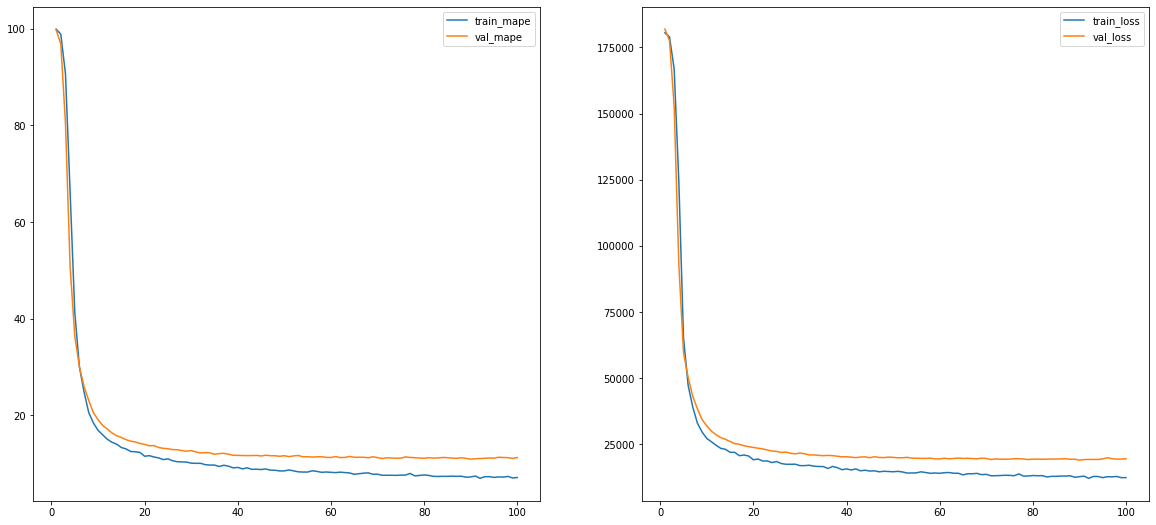

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.plot(epochs,train_mape,label='train_mape')
plt.plot(epochs,val_mape,label='val_mape')
plt.legend()
plt.subplot(222)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.legend()